## Importing essential libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
import pickle

## Loading train and test datasets

In [10]:
# url_train = "https://raw.githubusercontent.com/Biswa5812/Machine-Learning/master/Mobile%20Price%20Classification/train.csv"
# url_test = "https://github.com/Biswa5812/Machine-Learning/blob/master/Mobile%20Price%20Classification/test.csv"
data_train = pd.read_csv("E:/Resume_Project/Price Prediction/PricePrediction/mobile/dataset/train.csv")


## Visualizing and Feature Selection

In [11]:
data_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [12]:
data_train.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [13]:
data_train.isnull().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [14]:
data_train['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

## Univariate Feature Selection

In [15]:
x = data_train.iloc[:,0:20]
y = data_train.iloc[:,20:]

In [16]:
print(x.shape)
print(y.shape)

(2000, 20)
(2000, 1)


In [17]:
best_feat = SelectKBest(chi2,k=10)
fit = best_feat.fit(x,y)

In [18]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [19]:
# concat both dataframes for comparing best scores

score_list = pd.concat([dfcolumns,dfscores],axis=1)
score_list.columns = ["features","scores"]

In [20]:
score_list

,features,scores
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [21]:
print(score_list.nlargest(10,"scores"))

         features         scores
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


In [22]:
y

,price_range
0,1
1,2
2,2
3,2
4,1
...,...
1995,0
1996,2
1997,3
1998,0


## Feature Importance Selection

In [23]:
feat_imp = ExtraTreesClassifier()
feat_imp.fit(x,y)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16880\2935810956.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  feat_imp.fit(x,y)


ExtraTreesClassifier()

In [24]:
print(feat_imp.feature_importances_)

[0.06248834 0.01939873 0.03263904 0.01949195 0.03239254 0.01698202
 0.03442644 0.03367717 0.03548194 0.03340293 0.03395515 0.04757787
 0.0481441  0.3960457  0.03422737 0.03380895 0.03383634 0.01479611
 0.01768343 0.0195439 ]


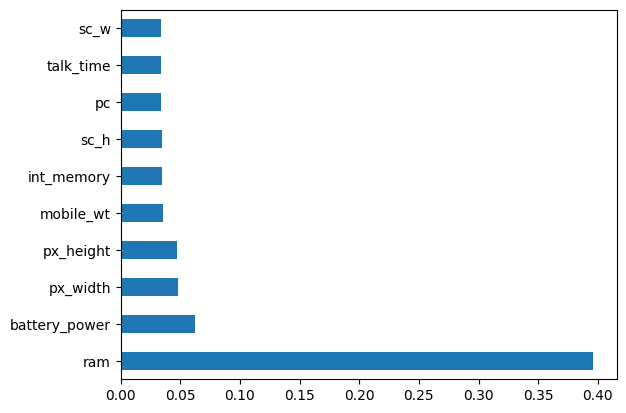

In [25]:
feat_importances = pd.Series(feat_imp.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Selecting the top 10 best features and dropping the remaining columns

In [26]:
data_train.drop(data_train.columns[[1,2,3,5,7,9,10,17,18,19]],axis=1,inplace=True)

In [27]:
data_train.head()

,battery_power,fc,int_memory,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,1,7,188,20,756,2549,9,7,19,1
1,1021,0,53,136,905,1988,2631,17,3,7,2
2,563,2,41,145,1263,1716,2603,11,2,9,2
3,615,0,10,131,1216,1786,2769,16,8,11,2
4,1821,13,44,141,1208,1212,1411,8,2,15,1


## Separating dependent and independent variable

In [28]:
x = data_train.iloc[:,0:10].values
y = data_train.iloc[:,10:].values

In [29]:
x

array([[ 842,    1,    7, ...,    9,    7,   19],
       [1021,    0,   53, ...,   17,    3,    7],
       [ 563,    2,   41, ...,   11,    2,    9],
       ...,
       [1911,    1,   36, ...,    9,    1,    5],
       [1512,    4,   46, ...,   18,   10,   19],
       [ 510,    5,   45, ...,   19,    4,    2]], dtype=int64)

In [30]:
y

array([[1],
       [2],
       [2],
       ...,
       [3],
       [0],
       [3]], dtype=int64)

## Applying cross validation technique on various models

In [36]:
from tkinter import TRUE


skfold = StratifiedKFold(n_splits=3)
model_c = RandomForestClassifier(criterion='entropy',n_estimators=10,n_jobs=-1)
results_skfold = model_selection.cross_val_score(model_c, x, y.ravel(), cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 87.10%


In [37]:
skfold = StratifiedKFold(n_splits=3)
model_c = KNeighborsClassifier(n_neighbors=10)
results_skfold = model_selection.cross_val_score(model_c, x, y.ravel(), cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 92.60%


In [39]:
skfold = StratifiedKFold(n_splits=3)
model_c = DecisionTreeClassifier()
results_skfold = model_selection.cross_val_score(model_c, x, y.ravel(), cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 82.15%


##Fitting the Best model on train data

In [40]:
knn = KNeighborsClassifier(n_neighbors=10)

In [41]:
knn.fit(x,y)

e:\Resume_Project\Price Prediction\price_prediction_env\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [52]:
pickle.dump(knn,open('model.pkl','wb'))

In [43]:

test_data = pd.read_csv("E:/Resume_Project/Price Prediction/PricePrediction/mobile/dataset/test.csv")

In [44]:
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [45]:
test_data.drop(test_data.columns[[0,2,3,4,6,8,10,11,18,19,20]],axis=1,inplace=True)

In [46]:
test_data.head()

,battery_power,fc,int_memory,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time
0,1043,14,5,193,226,1412,3476,12,7,2
1,841,4,61,191,746,857,3895,6,0,7
2,1807,1,27,186,1270,1366,2396,17,10,10
3,1546,18,25,96,295,1752,3893,10,0,7
4,1434,11,49,108,749,810,1773,15,8,7


In [47]:
x_test = test_data.iloc[:,0:20].values

In [48]:
x_test

array([[1043,   14,    5, ...,   12,    7,    2],
       [ 841,    4,   61, ...,    6,    0,    7],
       [1807,    1,   27, ...,   17,   10,   10],
       ...,
       [1185,    1,    8, ...,    5,    0,   14],
       [1533,    0,   50, ...,   15,   11,    6],
       [1270,    4,   35, ...,    9,    2,    3]], dtype=int64)

In [49]:
x.shape

(2000, 10)

In [50]:
x_test.shape

(1000, 10)

In [51]:
knn.predict(x_test)

array([3, 3, 3, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 2, 2, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 3, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,